# Time series

Data source: https://mymarketnews.ams.usda.gov/filerepo/sites/default/files/2983/2022-01-24/548997/ams_2983_00024.pdf

## Let's read in and plot



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
milk_df = pd.read_excel('USDA Milk production.xlsx', sheet_name='RAW', header=19)
milk_df.head()

,year,month,date,address,milk_B_lbs,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2017,1,2017-01-01,$B$2,17.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,2,2017-02-01,$C$2,15.649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,3,2017-03-01,$D$2,17.583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,4,2017-04-01,$E$2,17.220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,5,2017-05-01,$F$2,17.790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Read it in with usecols and index_col
milk_df = pd.read_excel('USDA Milk production.xlsx', sheet_name='RAW', header=19, usecols=['date', 'milk_B_lbs', 'year', 'month'], index_col=2)
milk_df.tail()

,year,month,milk_B_lbs
date,,,
2021-08-01,2021,8,17.927
2021-09-01,2021,9,17.255
2021-10-01,2021,10,17.821
2021-11-01,2021,11,17.239
2021-12-01,2021,12,18.006


<AxesSubplot:xlabel='date', ylabel='milk_B_lbs'>

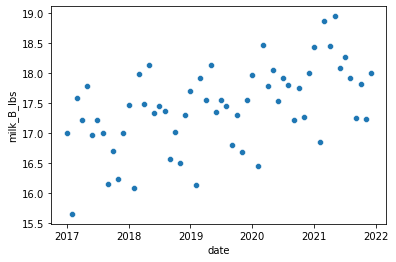

In [4]:
sns.scatterplot(data=milk_df, x='date', y='milk_B_lbs')

<AxesSubplot:xlabel='date', ylabel='milk_B_lbs'>

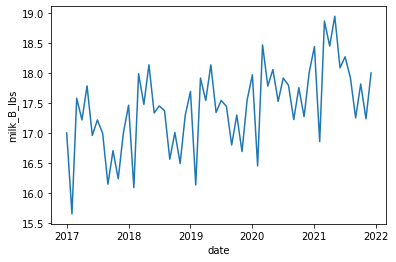

In [5]:
sns.lineplot(data=milk_df, x='date', y='milk_B_lbs')

## What does an OLS tell us?

- There is a trend, upward
- 

## What does the OLS miss?

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

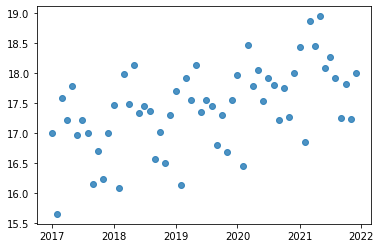

In [6]:
sns.regplot(data=milk_df, x=milk_df.index, y='milk_B_lbs')

### Ouch, regplot doesn't take Timestamps.

Write a converter to float, and use the float as the x axis.

In [7]:
def yyyy_mm_to_float(yyyy: int, mm: int) -> float:
    return yyyy + (mm-1) / 12.0
yyyy_mm_to_float(2017, 2)

2017.0833333333333

In [8]:
years = np.array(milk_df.year)
months = np.array(milk_df.month)
dates = yyyy_mm_to_float(years, months)
dates[-6:]

array([2021.5       , 2021.58333333, 2021.66666667, 2021.75      ,
       2021.83333333, 2021.91666667])

<AxesSubplot:ylabel='milk_B_lbs'>

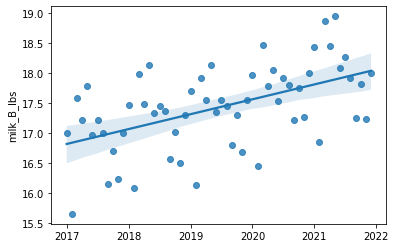

In [9]:
sns.regplot(data=milk_df, x=dates, y='milk_B_lbs')

<AxesSubplot:xlabel='date', ylabel='milk_B_lbs'>

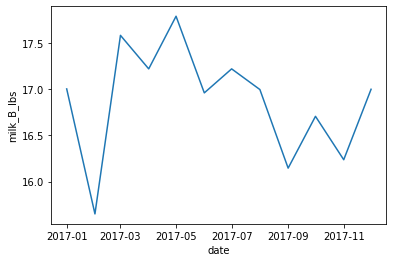

In [10]:
annual_prod = milk_df.query('year == 2017')
sns.lineplot(data=annual_prod, x='date', y='milk_B_lbs')

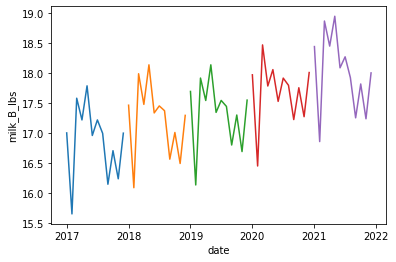

In [11]:
for year in range(2017,2022+1):
    annual_prod = milk_df.query(f'year == {year}')
    sns.lineplot(data=annual_prod, x='date', y='milk_B_lbs')

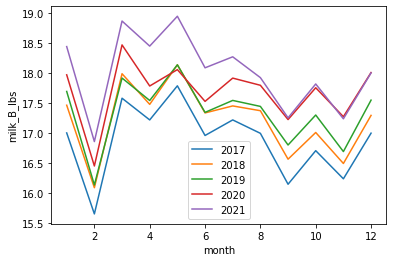

In [12]:
legend = []

for year in range(2017,2022+1):
    annual_prod = milk_df.query(f'year == {year}')
    legend.append(str(year))
    sns.lineplot(data=annual_prod, x='month', y='milk_B_lbs')
    
plt.legend(labels=legend)

# Let's import statsmodels to get the trends

## Tools to convert dates

sm.tsa.datetools.dates_from_range(start, end)

## It has some excellent built-in dataframes

In [13]:
import numpy as np
import statsmodels.api as sm

In [14]:
econ_df = sm.datasets.macrodata.load_pandas().data
print(sm.datasets.macrodata.NOTE)
econ_df.tail()

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [15]:
sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3')

[datetime.datetime(1959, 3, 31, 0, 0),
 datetime.datetime(1959, 6, 30, 0, 0),
 datetime.datetime(1959, 9, 30, 0, 0),
 datetime.datetime(1959, 12, 31, 0, 0),
 datetime.datetime(1960, 3, 31, 0, 0),
 datetime.datetime(1960, 6, 30, 0, 0),
 datetime.datetime(1960, 9, 30, 0, 0),
 datetime.datetime(1960, 12, 31, 0, 0),
 datetime.datetime(1961, 3, 31, 0, 0),
 datetime.datetime(1961, 6, 30, 0, 0),
 datetime.datetime(1961, 9, 30, 0, 0),
 datetime.datetime(1961, 12, 31, 0, 0),
 datetime.datetime(1962, 3, 31, 0, 0),
 datetime.datetime(1962, 6, 30, 0, 0),
 datetime.datetime(1962, 9, 30, 0, 0),
 datetime.datetime(1962, 12, 31, 0, 0),
 datetime.datetime(1963, 3, 31, 0, 0),
 datetime.datetime(1963, 6, 30, 0, 0),
 datetime.datetime(1963, 9, 30, 0, 0),
 datetime.datetime(1963, 12, 31, 0, 0),
 datetime.datetime(1964, 3, 31, 0, 0),
 datetime.datetime(1964, 6, 30, 0, 0),
 datetime.datetime(1964, 9, 30, 0, 0),
 datetime.datetime(1964, 12, 31, 0, 0),
 datetime.datetime(1965, 3, 31, 0, 0),
 datetime.datetime(

In [16]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
index

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

In [17]:
econ_df.index = index
econ_df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


# statsmodels has a Hodrick-Prescott filter

$ y_t = \mu_t + \eta_t $

In [18]:
sm.tsa.filters.hpfilter(econ_df['realgdp']) # makes a tuple with date and gdp

(1959-03-31     39.511915
 1959-06-30     80.088532
 1959-09-30     48.875455
 1959-12-31     30.591933
 1960-03-31     64.882667
                  ...    
 2008-09-30    102.018455
 2008-12-31   -107.269472
 2009-03-31   -349.047706
 2009-06-30   -397.557073
 2009-09-30   -333.115243
 Name: realgdp_cycle, Length: 203, dtype: float64,
 1959-03-31     2670.837085
 1959-06-30     2698.712468
 1959-09-30     2726.612545
 1959-12-31     2754.612067
 1960-03-31     2782.816333
                   ...     
 2008-09-30    13222.581545
 2008-12-31    13249.189472
 2009-03-31    13274.457706
 2009-06-30    13299.061073
 2009-09-30    13323.456243
 Name: realgdp_trend, Length: 203, dtype: float64)

In [19]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(econ_df['realgdp'])

<AxesSubplot:>

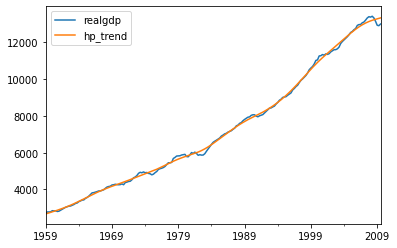

In [20]:
econ_df['hp_trend'] = gdp_trend
econ_df[['realgdp', 'hp_trend']].plot()

<AxesSubplot:>

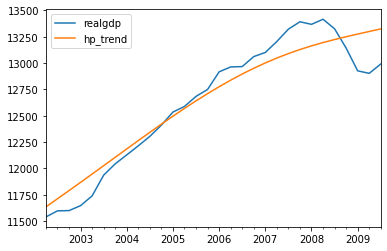

In [21]:
# zoom in to last 30 quarters
econ_df[['realgdp', 'hp_trend']][-30:].plot()

<AxesSubplot:>

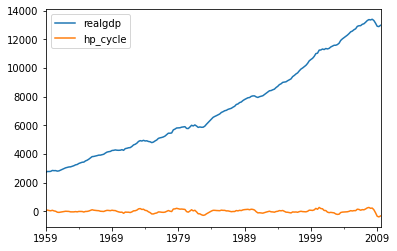

In [22]:
econ_df['hp_cycle'] = gdp_cycle
econ_df[['realgdp', 'hp_cycle']].plot()

<AxesSubplot:>

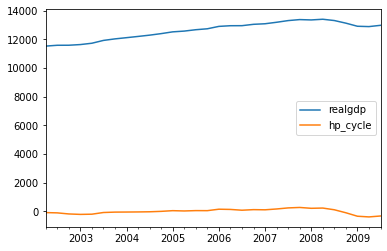

In [23]:
# Again, let's zoom in on the last 30
econ_df[['realgdp', 'hp_cycle']][-30:].plot()

# Back to milk production

## Can we use simple moving averages (SMA)?


\begin{equation}
SMA_t = \frac{\sum_{i=t-n}^{t} p_i} {n}
\end{equation}

where $p_i$ : price
$n$ : SMA length

In [24]:
milk_df['6-month-SMA'] = milk_df['milk_B_lbs'].rolling(window=6).mean()
milk_df['12-month-SMA'] = milk_df['milk_B_lbs'].rolling(window=12).mean()

<AxesSubplot:xlabel='date'>

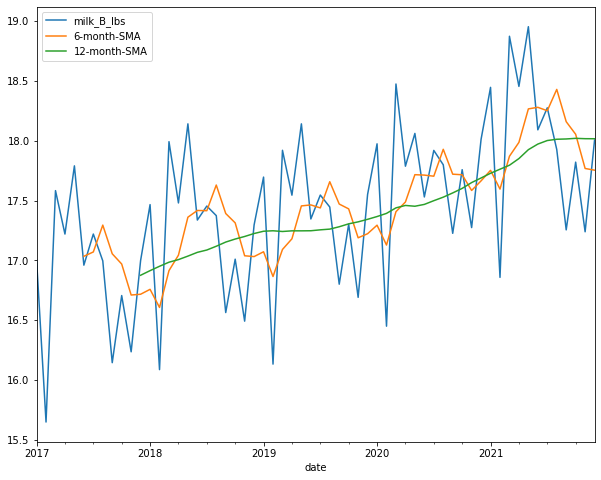

In [25]:
milk_df[['milk_B_lbs', '6-month-SMA', '12-month-SMA']].plot(figsize=[10,8])

## What about exponential moving averages (EMA)?

This weights the latest values more.

Reference: https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp


\begin{equation}
EMA_t = p_t k + EMA_{t-1} (1-k)
\end{equation}

where $p_t$ : price (today)

$n$ : EMA length

$k = \frac{2}{n + 1} $


<AxesSubplot:xlabel='date'>

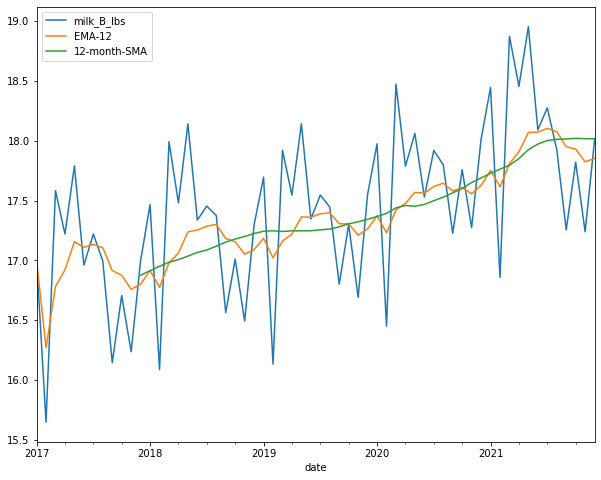

In [26]:
milk_df['EMA-12'] = milk_df['milk_B_lbs'].ewm(span=12).mean()
milk_df[['milk_B_lbs', 'EMA-12', '12-month-SMA']].plot(figsize=[10,8])

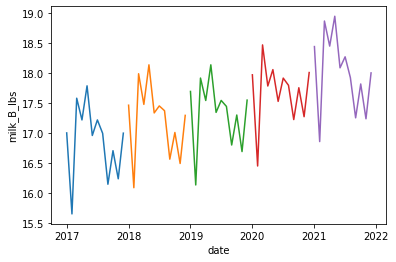

In [27]:
for year in range(2017,2022+1):
    annual_prod = milk_df.query(f'year == {year}')
    sns.lineplot(data=annual_prod, x='date', y='milk_B_lbs')

# Error - Trend - Seasonality
## Seasonal effect: pattern recurs annually

### Feb is a terrible month; March and May are great

Plain OLS would be consistently off in these months.
## Time series decomposition

ETS can tell us whether this is additive or multiplicative


In [28]:
milk_df.head()

,year,month,milk_B_lbs,6-month-SMA,12-month-SMA,EMA-12
date,,,,,,
2017-01-01,2017,1,17.003,NaN,NaN,17.003000
2017-02-01,2017,2,15.649,NaN,NaN,16.269583
2017-03-01,2017,3,17.583,NaN,NaN,16.782210
2017-04-01,2017,4,17.220,NaN,NaN,16.920403
2017-05-01,2017,5,17.790,NaN,NaN,17.156670


# Sidebar on Jupyter notebook nice-to-know

tab to autocomplete

Shift-tab within a function to see the parameters

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(milk_df.milk_B_lbs, model='additive', period=12) # model can be additive or multiplicative

In [66]:
type(result)

statsmodels.tsa.seasonal.DecomposeResult

<AxesSubplot:xlabel='date'>

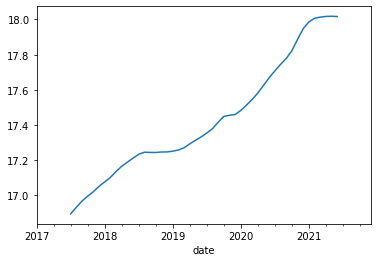

In [67]:
result.trend.plot()

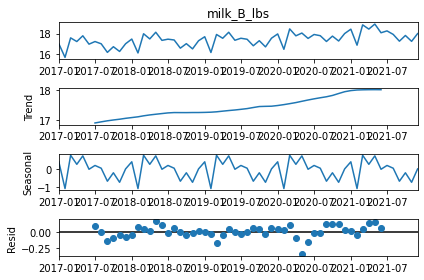

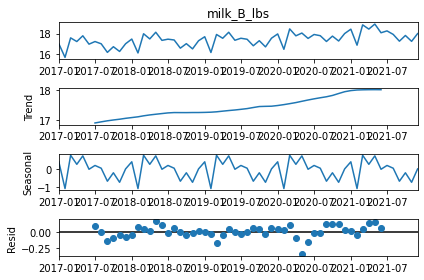

In [70]:
result.plot() # So nice they had to show it twice

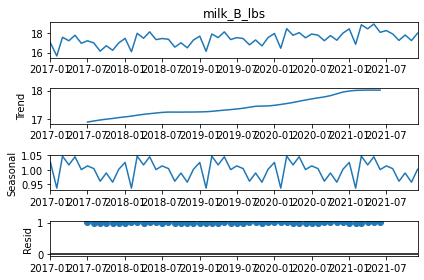

In [33]:
fig = result.plot()

# Why we should choose additive or multiplicative

The residual (or error) tells a story.

Random-looking residuals are better.

# ARIMA


## Stationarity test with Augmented Dickey-Fuller

We could tell by eye that the data was not stationary, because of an increasing mean. 

Null Hypthosis is that the time series is non-stationary.

Small p-value (p < 0.05) is strong evidence against the Null Hypothesis. 

Large p-value means we fail to reject the Null Hypothesis.

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
result = adfuller(milk_df.milk_B_lbs)

In [36]:
result

(0.4430503288077037,
 0.9830354152669473,
 11,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 1.8425615555905637)

In [37]:
def adf_check(time_series: pd.Series):
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller test')
    lables = ['ADF Test Statistic', 'p-value', '# of lags', 'num of observations']
    for value, label in zip(result, lables):
        print(f'{label}\t : {value}')
        
    if result[1] < 0.05:
        print("strong evidence against null hypothesis (reject). Data has no unit root and is stationary.")
    else:
        print("weak evidence against null hypothesis (fail to reject). Data is non-stationary")

In [38]:
adf_check(milk_df.milk_B_lbs)

Augmented Dickey-Fuller test
ADF Test Statistic	 : 0.4430503288077037
p-value	 : 0.9830354152669473
# of lags	 : 11
num of observations	 : 48
weak evidence against null hypothesis (fail to reject). Data is non-stationary


Augmented Dickey-Fuller test
ADF Test Statistic	 : -2.0073188475880457
p-value	 : 0.28337328867990713
# of lags	 : 11
num of observations	 : 47
weak evidence against null hypothesis (fail to reject). Data is non-stationary


<AxesSubplot:xlabel='date'>

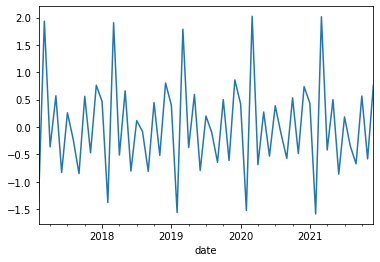

In [71]:
# First difference
# Take differences to make it stationary

milk_df['first_diff'] = milk_df['milk_B_lbs'] - milk_df['milk_B_lbs'].shift(1)

adf_check(milk_df['first_diff'].dropna())
milk_df['first_diff'].dropna().plot()

Augmented Dickey-Fuller test
ADF Test Statistic	 : -2.8333853588733966
p-value	 : 0.05366087992543236
# of lags	 : 1
num of observations	 : 46
weak evidence against null hypothesis (fail to reject). Data is non-stationary


<AxesSubplot:xlabel='date'>

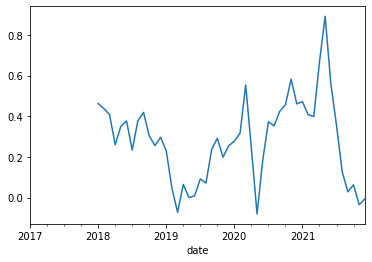

In [72]:
# Seasonal difference
milk_df['seasonal_diff'] = milk_df['milk_B_lbs'] - milk_df['milk_B_lbs'].shift(12)
adf_check(milk_df['seasonal_diff'].dropna())

milk_df['seasonal_diff'].plot()

In [43]:
# Seasonal first difference
milk_df['seasonal_1st_diff'] = milk_df['first_diff'] - milk_df['first_diff'].shift(12)
adf_check(milk_df['seasonal_1st_diff'].dropna())

Augmented Dickey-Fuller test
ADF Test Statistic	 : -6.3088488231961115
p-value	 : 3.2722710226049994e-08
# of lags	 : 1
num of observations	 : 45
strong evidence against null hypothesis (reject). Data has no unit root and is stationary.


<AxesSubplot:xlabel='date'>

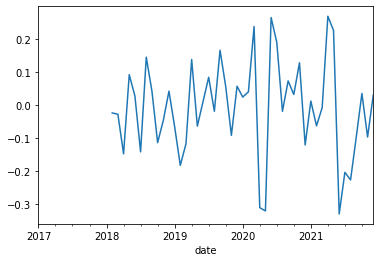

In [44]:
milk_df['seasonal_1st_diff'].plot()

# Have statsmodels compute the ACF and PACF

AutoCorrlelation and Partial AutoCorrelation Functions

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

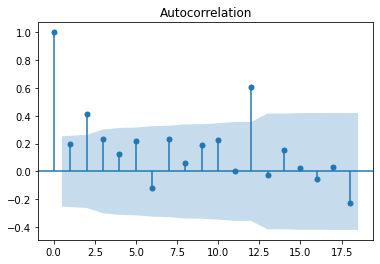

In [73]:
# ACF for raw milk numbers
fig_raw = plot_acf(milk_df['milk_B_lbs'].dropna()) # Note spike at 12

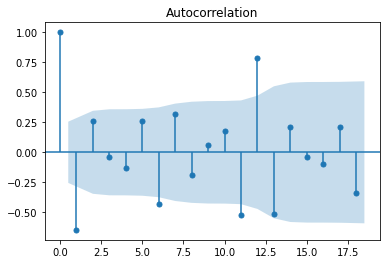

In [46]:
# ACF for first diff
fig_first = plot_acf(milk_df['first_diff'].dropna())

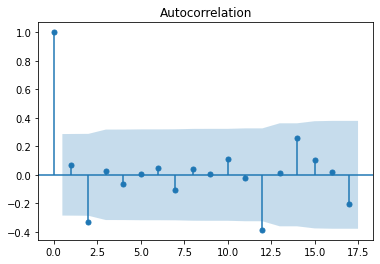

In [47]:
# ACF for seasonal diff
fig_seasonal = plot_acf(milk_df['seasonal_1st_diff'].dropna()) # Note affect on 12-month lag

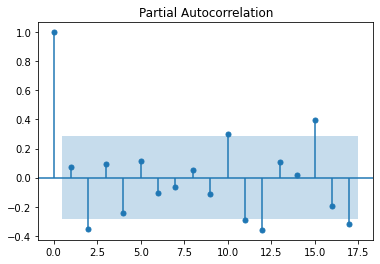

In [48]:
# PACF
fig_seasonal = plot_pacf(milk_df['seasonal_1st_diff'].dropna()) # Note sudden drop-off. We'll stick with AR.

In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [50]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  .. deprecated:: 0.12
 |     Use statsmodels.tsa.arima.model.ARIMA instead
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M',

In [51]:
# Seasonal ARIMA + eXogenous 
# Order
# Seasonal order
model = sm.tsa.statespace.SARIMAX(milk_df['milk_B_lbs'], order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\rajah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\rajah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\rajah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\rajah\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           milk_B_lbs   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                  30.914
Date:                              Sat, 26 Feb 2022   AIC                            -55.827
Time:                                      15:34:15   BIC                            -50.277
Sample:                                  01-01-2017   HQIC                           -53.739
                                       - 12-01-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1340      0.519      0.258      0.796      -0.884       1.152
ma.S.L12      -0.9568      5.271     -0.182      0.856     -11.287       9.373
sigma2         0.0115      0.056      0.207      0.836      -0.098       0.121
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.93
Prob(Q):                              0.81   Prob(JB):                         0.63
Heteroskedasticity (H):               1.30   Skew:                            -0.27
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
# Look at the residuals (errors)
results.resid

date
2017-01-01    17.003000
2017-02-01    -1.354000
2017-03-01     1.934000
2017-04-01    -0.363000
2017-05-01     0.570000
2017-06-01    -0.830000
2017-07-01     0.260000
2017-08-01    -0.224000
2017-09-01    -0.851000
2017-10-01     0.561000
2017-11-01    -0.470000
2017-12-01     0.763000
2018-01-01    -8.034500
2018-02-01    -0.025000
2018-03-01    -0.029000
2018-04-01    -0.149000
2018-05-01     0.091000
2018-06-01     0.026000
2018-07-01    -0.143000
2018-08-01     0.144000
2018-09-01     0.041000
2018-10-01    -0.115000
2018-11-01    -0.048000
2018-12-01     0.041000
2019-01-01    -0.067000
2019-02-01    -0.194809
2019-03-01    -0.130539
2019-04-01     0.072577
2019-05-01    -0.025654
2019-06-01     0.020242
2019-07-01     0.021171
2019-08-01     0.042262
2019-09-01     0.182727
2019-10-01     0.005277
2019-11-01    -0.113754
2019-12-01     0.073727
2020-01-01    -0.005969
2020-02-01    -0.072047
2020-03-01     0.161880
2020-04-01    -0.279800
2020-05-01    -0.331161
2020-06-01 

<AxesSubplot:xlabel='date'>

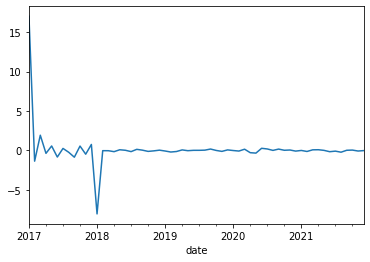

In [54]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

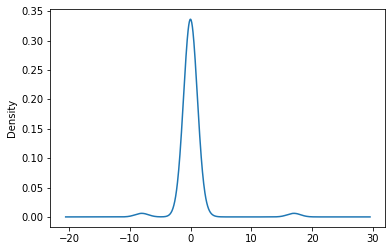

In [55]:
# How are the errors distributed? Should be mostly around 0.
results.resid.plot(kind='kde') # plot the errors as a Probability Density Function. kde= Kernel Density Estimation

In [56]:
# Using the ARIMA model, predict the last 20 points.
milk_df['forecast'] = results.predict(start=40, end=60) 

<AxesSubplot:xlabel='date'>

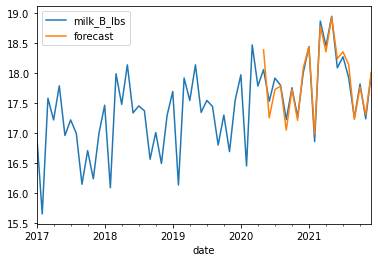

In [57]:
milk_df[['milk_B_lbs', 'forecast']].plot()

# Forecasting values

Can't just make end=80 because there are no rows to add the forecast column to.

In [58]:
milk_df.tail()

,year,month,milk_B_lbs,6-month-SMA,12-month-SMA,EMA-12,first_diff,seasonal_diff,seasonal_1st_diff,forecast
date,,,,,,,,,,
2021-08-01,2021,8,17.927,18.428833,18.012250,18.076216,-0.348,0.128,-0.228,18.143037
2021-09-01,2021,9,17.255,18.159167,18.014667,17.949866,-0.672,0.029,-0.099,17.227919
2021-10-01,2021,10,17.821,18.053667,18.019917,17.930039,0.566,0.063,0.034,17.770234
2021-11-01,2021,11,17.239,17.768000,18.017000,17.823720,-0.582,-0.035,-0.098,17.307882
2021-12-01,2021,12,18.006,17.753833,18.016500,17.851764,0.767,-0.006,0.029,18.020519


In [59]:
from pandas.tseries.offsets import DateOffset
future_dates = [milk_df.index[-1] + DateOffset(months=m) for m in range (1, 12)]
future_dates

[Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00')]

In [60]:
milk_future_df = pd.DataFrame(index=future_dates, columns=milk_df.columns)
milk_future_df.head()

,year,month,milk_B_lbs,6-month-SMA,12-month-SMA,EMA-12,first_diff,seasonal_diff,seasonal_1st_diff,forecast
2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
milk_forecast_df = pd.concat([milk_df, milk_future_df])
milk_forecast_df.tail(14)

,year,month,milk_B_lbs,6-month-SMA,12-month-SMA,EMA-12,first_diff,seasonal_diff,seasonal_1st_diff,forecast
2021-10-01,2021,10,17.821,18.053667,18.019917,17.930039,0.566,0.063,0.034,17.770234
2021-11-01,2021,11,17.239,17.768000,18.017000,17.823720,-0.582,-0.035,-0.098,17.307882
2021-12-01,2021,12,18.006,17.753833,18.016500,17.851764,0.767,-0.006,0.029,18.020519
2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
milk_forecast_df['forecast'] = results.predict(start=40, end=72) 
milk_forecast_df.tail(14)

,year,month,milk_B_lbs,6-month-SMA,12-month-SMA,EMA-12,first_diff,seasonal_diff,seasonal_1st_diff,forecast
2021-10-01,2021,10,17.821,18.053667,18.019917,17.930039,0.566,0.063,0.034,17.770234
2021-11-01,2021,11,17.239,17.768000,18.017000,17.823720,-0.582,-0.035,-0.098,17.307882
2021-12-01,2021,12,18.006,17.753833,18.016500,17.851764,0.767,-0.006,0.029,18.020519
2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.438593
2022-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.942689
2022-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.889117
2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.428786
2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.946238
2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.164702
2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.388199


<AxesSubplot:>

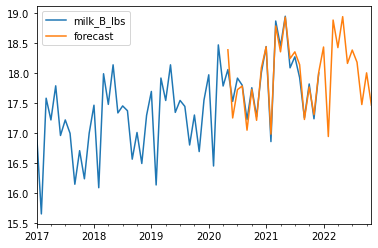

In [63]:
milk_forecast_df[['milk_B_lbs', 'forecast']].plot()

# Resampling to get a different time scale

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

## Looking at BTC Daily data

In [81]:
btc_df = pd.read_csv('../Module 3/BTC-USD.csv')
btc_df['Date'] = pd.to_datetime(btc_df['Date']) # make it a Datetime, or the resample won't work
btc_df.set_index('Date', inplace=True)
btc_df.head(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,4.526595e+10
2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,5.128744e+10
2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,4.675496e+10
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,4.073030e+10
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,6.786542e+10
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,7.866524e+10
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,8.116348e+10
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,6.754732e+10
2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,7.528943e+10


In [82]:
btc_df.index

DatetimeIndex(['2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01',
               '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07',
               ...
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-25', '2021-12-26', '2021-12-27',
               '2021-12-28', '2021-12-29'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [90]:
btc_mon_close = btc_df['Close'].resample('M', convention='end').mean()
btc_mon_high = btc_df['High'].resample('M').max()
btc_mon_high

Date
2020-12-31    29244.876953
2021-01-31    41946.738281
2021-02-28    58330.570313
2021-03-31    61683.863281
2021-04-30    64863.097656
2021-05-31    59519.355469
2021-06-30    41295.269531
2021-07-31    42235.546875
2021-08-31    50482.078125
2021-09-30    52853.765625
2021-10-31    66930.390625
2021-11-30    68789.625000
2021-12-31    59041.683594
Freq: M, Name: High, dtype: float64

In [92]:
# These are pandas series, but can easily be a part of a dataframe
d = {'Close': btc_mon_close, 'High': btc_mon_high}
btc_mon_df = pd.DataFrame(data=d,)
btc_mon_df

,Close,High
Date,,
2020-12-31,28401.703776,29244.876953
2021-01-31,34761.649950,41946.738281
2021-02-28,46306.798968,58330.570313
2021-03-31,54998.008695,61683.863281
2021-04-30,57206.720052,64863.097656
2021-05-31,46443.286668,59519.355469
2021-06-30,35845.154688,41295.269531
2021-07-31,34444.973790,42235.546875
2021-08-31,45709.022682,50482.078125
